<a href="https://colab.research.google.com/github/kota-del/Demand-Prediction-for-Public-Transport---Capstone-Project/blob/main/Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import datetime

In [ ]:
# dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4/Week 1/Day 1/train_revised.csv')      
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Copy of Nairobi Transport Data.zip (Unzipped Files)/train_revised.csv')
dataset.head()

FileNotFoundError: ignored

In [ ]:
dataset.tail()

# Understanding The data

In [ ]:
dataset.shape


In [ ]:
dataset.info()

In [ ]:
dataset.describe(include='object')

# Summary:
          
*  There are total 61 unique seats in this dataset
travelers have used 2 types of payment method and most of the people have used Mpesa to pay for their ticket.


* The record of 149 days out of 2 year is present in this dataset.
*   There are 2 different types of car and most of them are bus.






In [ ]:
dataset.isnull().sum()

We don't see any null values in the dataset now.

so let us explore the dataset more.

In [ ]:
len(dataset['ride_id'].unique())

We see there are 6249 unique ride_id.

In [ ]:
column = dataset.columns

In [ ]:
column

# **EDA**

In [ ]:
plot_count_cols = ['payment_method','car_type','max_capacity']
for plots in plot_count_cols:
  sns.countplot(dataset[plots])
  plt.show()

# **Summary**


*   There are two type of payment methods people have used to buy the tickets.
*   There are two type of cars Bus and shuttle and the maximum capacity of the bus is 49 while shuttle can contain 11 travelers.



In [ ]:
dataset['travel_from'].value_counts().plot(kind='bar')
plt.show()

NameError: ignored

In [ ]:
dataset['travel_time'].value_counts().plot(kind='bar')
plt.show()


# **Finding** **our** **Target** **Variable** 


*   Since we are not given the target variable so we need to find target variable first.
*   There might be many ways of finding the target variable but here I am using one way that is I will find the count of each ride_id and that will be the number_of_ticket as our target variable.





In [ ]:
label=dataset.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
label.head()

## Now we found our target variable so let us delete the duplicate values from ride_id


In [ ]:
dataset=dataset.drop_duplicates("ride_id")

In [ ]:
dataset.shape

Now let us merge two datasets on ride_id key to make the final dataset where we have dependent as well as independent variables too.




In [ ]:
dataset = dataset.merge(label, how="left",on="ride_id")
dataset.head()

Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model

In [ ]:
dataset = dataset.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [ ]:
# X = dataset.drop('number_of_ticket', axis=1)
# y = dataset['number_of_ticket']

# **Removing Constant Features**
We need to first remove the constant features.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset.drop(["travel_to"],axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(20, 15))

sp = sns.scatterplot(x="travel_from", y="number_of_ticket", data=dataset)

# **Feature Engineering**

In [ ]:
#concatinate travel date and travel time column and make a new feature called date.
dataset["date"]=dataset["travel_date"]+ " "+dataset["travel_time"]


In [ ]:
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [ ]:
dataset_new = time_features(dataset)

In [ ]:
dataset_new.head()

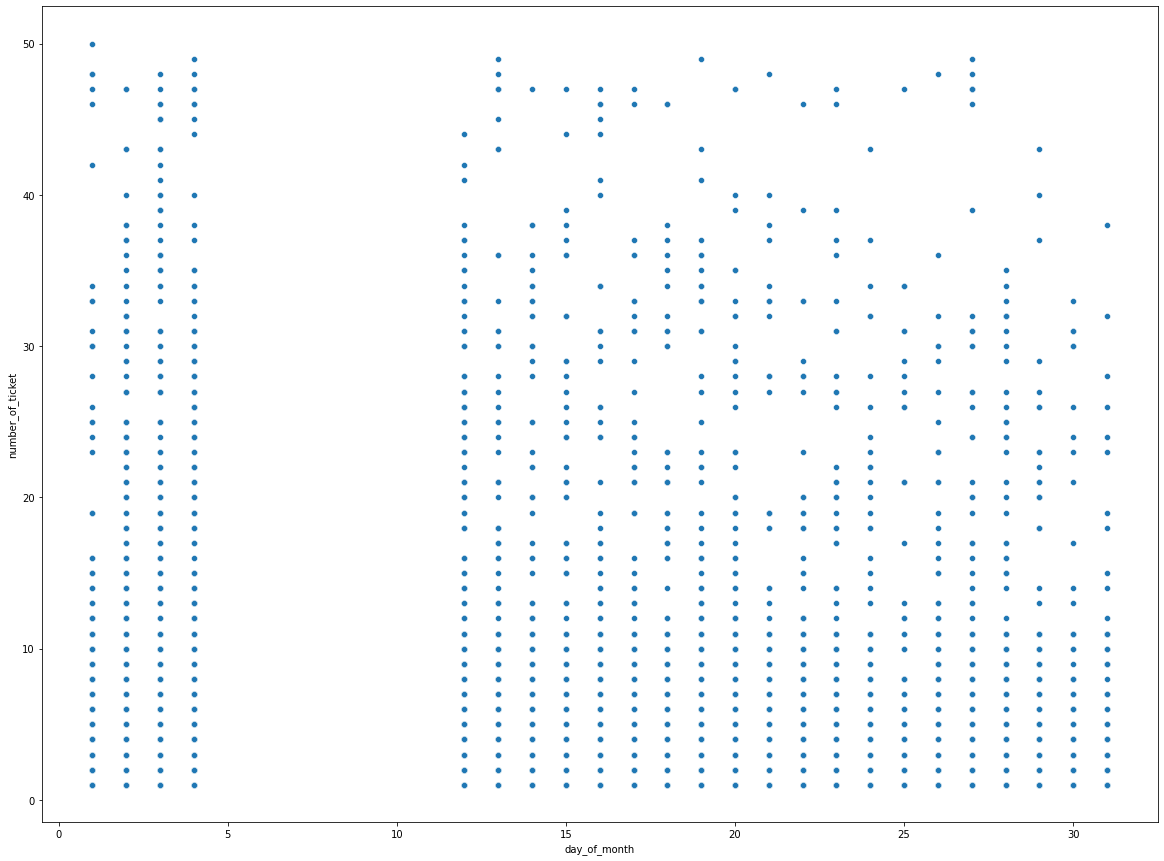

In [ ]:

plt.figure(figsize=(20, 15))

sns.scatterplot(x='day_of_month', y="number_of_ticket", data=dataset)


# **Summary**


*   We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.



In [ ]:
plt.figure(figsize=(20, 15))

sns.scatterplot(x='hour', y="number_of_ticket", data=dataset)

# **Summary**

*   We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.
*   From the above we can say that there is not ride between 12pm to 5.30Pm



In [ ]:
split(':dataset_new["travel_time"] = dataset_new["travel_time"].str.').apply(lambda x: int(x[0]) + int(x[1])/60)

In [ ]:
dataset_new['period'] = np.nan

dataset_new.loc[dataset_new.travel_time < 7, 'period'] = 'em'
dataset_new.loc[(dataset_new.travel_time >= 7) & (dataset_new.travel_time < 11), 'period'] = 'am'
dataset_new.loc[(dataset_new.travel_time >= 11) & (dataset_new.travel_time < 15), 'period'] = 'mid'
dataset_new.loc[(dataset_new.travel_time >= 15) & (dataset_new.travel_time < 19), 'period'] = 'eve'
dataset_new.loc[(dataset_new.travel_time >= 19) & (dataset_new.travel_time <= 24), 'period'] = 'pm'


pcount = dict(dataset_new['period'].value_counts())
pcount


dataset_new['hourly_travelers'] = np.log1p(dataset_new['period'].map(pcount))



dcount = dict(dataset_new["day_of_year"].value_counts())
dataset_new["daily_travelers"] = np.log1p(dataset_new["day_of_year"].map(dcount))
dataset_new.head()

In [ ]:
dataset_new.columns


In [ ]:
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']

In [ ]:
transport_dataset=dataset_new.copy()

In [ ]:
transport_dataset.head()

In [ ]:
transport_dataset.shape

In [ ]:
transport_dataset.month.value_counts()

In [ ]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
transport_dataset['month'].replace(dict_cov,inplace=True)
  

In [ ]:
transport_dataset.month.value_counts()

In [ ]:
transport_dataset.day_of_month.unique()

In [ ]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
transport_dataset['day_of_month'].replace(conv_dict,inplace=True)

In [ ]:
transport_dataset['day_of_month'].value_counts()

In [ ]:
transport_dataset.head()

In [ ]:
# # function to find the characterstics of the variable in the dataframe.
# def data_characterization(df):
#   '''This function takes dataframe as an argument and returns 
#     the characterstics of the features of the dataframe'''
#   characterized_df = pd.DataFrame(columns=['Columns name',	'Type', 'unique values Count', 'Count Nan values','Ratio Nan values','Unique values',	'Max',	'Min','Mean','std'])
#   for col in df.columns:
#     try:
#       characterized_df = characterized_df.append({'Columns name':col,	'Type':df[col].dtype, 'unique values Count':len(df[col].unique()), 
#                                                   'Count Nan values':df[col].isnull().sum(),'Ratio Nan values':df[col].isnull().sum()/df[col].shape[0],
#                                                   'Unique values':df[col].unique(),	'Max':df[col].max(),	'Min':df[col].min(),'Mean':df[col].mean(),'std':df[col].std()},
#                                                 ignore_index=True)
#     except:
#       characterized_df = characterized_df.append({'Columns name':col,	'Type':df[col].dtype, 'unique values Count':len(df[col].unique()), 
#                                                   'Count Nan values':df[col].isnull().sum(),'Ratio Nan values':df[col].isnull().sum()/df[col].shape[0],
#                                                   'Unique values':df[col].unique(),	'Max':np.nan,	'Min':np.nan,'Mean':np.nan,'std':np.nan},
#                                                 ignore_index=True)
  # return characterized_df

In [ ]:
# data_characterization(transport_dataset)

Series.shift(periods=1, freq=None, axis=0, fill_value=None)

 Shift index by desired number of periods with an optional time freq.

When freq is not passed, shift the index without realigning the data. If freq is passed (in this case, the index must be date or datetime, or it will raise a NotImplementedError), the index will be increased using the periods and the freq. freq can be inferred when specified as “infer” as long as either freq or inferred_freq attribute is set in the index.

Series-dt.total_seconds() function:-

The dt.total_seconds() function is used to return total duration of each element expressed in seconds.



In [ ]:
upbyift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.sh# Let us find the difference between next and previous buses
# And count the travel per minut trip
def find_difference_bw_bus(data):
  
  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.gro(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")

  
  return data

In [ ]:
data = find_difference_bw_bus(transport_dataset)

In [ ]:
data.isnull().sum()

We see that there are some null values present in the dataset so let us reomove those null values



In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

In [ ]:
from datetime import datetime
from datetime import timedelta

Now let us find the distance of each origin point from the distination point. I used Nirobi Map to estimate the distance from origin point to destination map.

In [ ]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
data["travel_from_distance"]=data.travel_from.map(distance)

In [ ]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
data["travel_from_time"]=data.travel_from.map(time)

In [ ]:
data["Speed"]=data.travel_from_time/data.travel_from_distance

In [ ]:
plt.scatter(data['Speed'],data['number_of_ticket'])

In [ ]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys(): 
    time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin 
data["Date_of_traveling_from_origin"]=data.travel_from.map(time)

# find the date of arrival at distination
data["arrival_date"]=data.date+ data.Date_of_traveling_from_origin
data["hod_arrived_date"]=data["arrival_date"].dt.hour
data["minute_arrived_date"]=data["arrival_date"].dt.minute
del data["Date_of_traveling_from_origin"],data["arrival_date"]
data["is_rush_hour"]=0
data.loc[data.hod_arrived_date.between(7,17),"is_rush_hour"]=1

# **Encoding Categorical features**

In [ ]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
data.replace(label_enc,inplace=True)


In [ ]:
data.head()

# Training the models

In [ ]:
keys= ["ride_id"]
Target_name="number_of_ticket"
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'year_woy','max_capacity','number_of_ticket',
               'period'
]


In [ ]:
features = data.drop(not_used_cols,axis=1).columns

In [ ]:
features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
data[features].head()

# **Linear Regression**

In [ ]:
import math

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [ ]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
  used_cols.append(col)
  dataset_pr = data[used_cols]
  X= dataset_pr.copy()
  y = data['number_of_ticket']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  # Predicting 
  y_pred = model.predict(X_test)
  #Find R-squared value
  r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test,y_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(r2)
print('Important features are: \n')
used_cols

In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

# **Implementing Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
X= data[used_cols].copy()
y = data['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
alphas = [0.01,0.025,0.5,0.75,1]
for alpha in alphas:
  lasso  = Lasso(alpha=alpha , max_iter= 3000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))


We see that at alpha = 0.01 it give best out of those



In [ ]:
lasso  = Lasso(alpha=0.01 , max_iter= 3000)
  lasso.fit(X_train, y_train)

In [ ]:
y_test_pred = lasso.predict(X_test)


print('MSE is {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE is {}'.format(math.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MAE is {}'.format(mean_absolute_error(y_test, y_test_pred)))

In [ ]:
r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperprarameter tuning
X= data[features].copy()
y = data['number_of_ticket']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)
print(ridge_regressor.score(X_train,y_train))
print(ridge_regressor.score(X_test,y_test))

print_metrics(y_test, y_test_pred)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# **Training Gradient Boosting Regressor**

In [ ]:
 y_pred_train=reg.predict(X_train)
  

  # Find Adjusted R-squared value
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
 #Find R-squared valueused_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
  used_cols.append(col)
  dataset_pr = data[used_cols]
  X= dataset_pr.copy()
  y = data['number_of_ticket']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  reg = GradientBoostingRegressor(random_state=0)
  reg.fit(X_train, y_train)
  # Predicting 
  y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_for_train= r2_score(y_train,y_pred_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test,y_test)
  else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'r2_Test score: {r2}')
print(f'r2_train score: {r2_for_train}')
print_metrics(y_test, y_pred)
print('Important features are: \n')
used_cols

In [ ]:
r2

In [ ]:
adj_r2


# **Training XGboost**

In [ ]:
import xgboost as xgb
# dataset_pr = data[]
X = data[used_cols].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train=dreg.predict(X_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
adj_r2
r2
r2_train

In [ ]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# **Random Forest Regressor**

In [ ]:
X = data[features].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
dec_reg =RandomForestRegressor()

In [ ]:
dec_reg.fit(X_train,y_train)

In [ ]:
dec_reg.score(X_train,y_train)

In [ ]:
dec_reg.score(X_test,y_test)

Model seems to be overfitted.

# **grid search cv on Random forest**

In [ ]:
parameters = {  'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]  
}

In [ ]:
X = data[features].copy()
y = data['number_of_ticket'].copy()
dec_reg =RandomForestRegressor()
rf_grid =GridSearchCV(dec_reg,param_grid=parameters, verbose=1,cv=2)
rf_grid.fit(X, y)

In [ ]:
rf_grid.best_estimator_.get_params()

In [ ]:
rf_optimal_model =rf_grid.best_estimator_
rf_train_preds = rf_optimal_model.predict(X_train)
rf_test_preds = rf_optimal_model.predict(X_test)
train_score= rf_optimal_model.score(X_train,y_train)
test_score = rf_optimal_model.score(X_test,y_test)

#Find R-squared value
r2 = r2_score(y_test, rf_test_preds)
r2_train = r2_score(y_train, rf_train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test,rf_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print('Train Score: ',train_score)
print('Test Score: ',test_score)
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, rf_test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, rf_test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, rf_test_preds)))
print('R2 Score: ',r2)
print('R2_train Score: ',r2_train)
print('Adjusted R2 Score: ',adj_r2)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Grid Search CV on XGboost algorithm**

In [ ]:
import xgboost as xgb

xgb = xgb.XGBRegressor()

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
X = data[features].copy()
y = data['number_of_ticket'].copy()

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

In [ ]:
reg_gs.best_estimator_.get_params()

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_train,y_train)

In [ ]:
reg_optimal_model.score(X_test,y_test)

In [ ]:
#Find R-squared value
r2_test = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:
adj_r2

In [ ]:
plt.scatter(y_test,test_preds)

In [ ]:
importances = reg_optimal_model.feature_importances_

In [ ]:
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

In [ ]:
importance_df = pd.DataFrame(importance_dict)

In [ ]:
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [ ]:
imp_features = important_features['Feature'].tolist()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y = important_features['Feature'], x = important_features['Feature Importance'] )
plt.title('10 Most Important features')
plt.show()

# **Evaluating the model**

In [ ]:
print('Mean Squared Error (MSE): ',mean_squared_error(y_test, test_preds))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test, test_preds))
print('Root Mean Squared Error (MSE): ',np.sqrt(mean_squared_error(y_test, test_preds)))
print('R2 Score: ',r2_test)
print('Adjusted R2 Score: ',adj_r2)


In [ ]:
# Function to make a dataframe of evaluation matrics for a model
def make_dataFrame(model, df,Model_name,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_train):
  
  '''This function takes arugment as model name and training and testing
    data and a datafram and returns a dataframe after appending the entries of
    evaluation matrics for a model  
  '''
  df = pd.DataFrame(columns=['Model Name','Train Score','test_score','R2 Score','Adjusted R2 Score','MSE','MAE'])
  model_train_preds = model.predict(X_train)
  model_test_preds = model.predict(X_test)



  train_score = model.score(y_train,model_train_preds)
  test_score = model.score(y_test,model_test_preds)
  r2 = r2_score(y_test,model_trainProb_preds)
  adjusted_r2 = 1-(1-r2_score(y_test, model_test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  mse =  mean_squared_error(y_test, model_train_preds)
  mae = mean_absolute_error(y_test, model_train_preds)
  metrix_dict = {'model_name':Model_name,
                 'Train Score':train_score,
                 'Test Score':test_score,
                 'R2 Score':r2, 
                 'Adjusted R2 Score':adjusted_r2,
                 'MSE':mse,
                 'MAE':mae,
               }
  df = df.append(metrix_dict,ignore_index = True)
  return df

In [ ]:
# Create a dictionary of instances of all the models with model name as value
models = {model:"Linear Regression",lasso:"Lasso Regression",ridge_regressor: "Ridge Regression",rf_optimal_mode: "Random Forest Regressor",}


# **Conclusion**
We used diffent type of regression algorithms to train our model like, Linear Regression, Regularized linear regression (Ridge and Lasso), GBM,Random Forest Regressor, XGboost regresssor. and Also we tuned the parameters of Random forest regressor and XGboost regressor and also found the important features for training the model. Out of  XGboost with tuned hyperparameters gave the best result.